In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
connection = psycopg2.connect('user=postgres', password='*******',
                              host='127.0.0.1',port='5432', database='Analyzing eCommerce Business Performance with SQL')
cur = connection.cursor()

In [6]:
cur.execute('Select Version();')
record = cur.fetchone()
print('You are connected to - ',record)

You are connected to -  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


In [7]:
cur.execute("""SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'""")
for table in cur.fetchall(): # cur.fetchall berfungsi untuk menampilkan seluruh tabel pada database
    print(table)

('customers_dataset',)
('geolocation_dataset',)
('order_items_dataset',)
('order_payments_dataset',)
('order_reviews_dataset',)
('orders_dataset',)
('product_dataset',)
('sellers_dataset',)
('company_revenues',)
('cancel_peryear',)
('the_best_kategori',)
('the_bad_categori',)


In [8]:
cur = connection.cursor()
cur.execute("""select payment_type, sum (case when Year = 2016 then jumlah else 0 end) as total_2016, sum (case when Year = 2017 then jumlah else 0 end) as total_2017, sum (case when Year = 2018 then jumlah else 0 end) as total_2018, sum (jumlah) as Total from ( select extract (year from od.order_purchase_timestamp) as Year, od.order_status, opd.payment_type,count(*) as jumlah from orders_dataset od join order_payments_dataset opd on od.order_id = opd.order_id group by 1,2,3 order by 4 desc) tmp group by 1 order by 1 """)

hasil = cur.fetchall()

# Mendapatkan daftar nama kolom dari objek kursor
kolom = [desc[0] for desc in cur.description]

df= pd.DataFrame(hasil, columns=kolom)
df.head()


,payment_type,total_2016,total_2017,total_2018,total
0,boleto,63,9508,10213,19784
1,credit_card,258,34568,41969,76795
2,debit_card,2,422,1105,1529
3,not_defined,0,0,3,3
4,voucher,23,3027,2725,5775


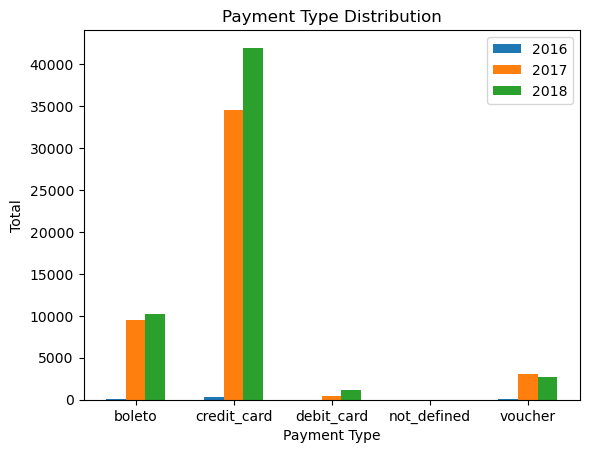

In [9]:
width =0.2
x =range(len(df['payment_type']))

plt.bar(x, df['total_2016'], width=width, label ='2016')
plt.bar([i + width for i in x], df['total_2017'], width=width, label= '2017')
plt.bar([i + 2*width for i in x], df['total_2018'], width=width, label='2018')

plt.xlabel('Payment Type')
plt.ylabel('Total')
plt.title('Payment Type Distribution')

plt.xticks([i + width for i in x], df['payment_type'])
plt.legend ()
plt.show()


